<a href="https://colab.research.google.com/github/alshashiguchi/machine_learning_colab/blob/master/Introdu%C3%A7%C3%A3o_a_machine_learning_e_classifica%C3%A7%C3%A3o_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install graphviz==0.10
#necessario instalar no cloud ele obriga
#!apt-get install graphviz

###Importações de pacotes

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


#Carregamento do dataset

In [0]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


##Renomear as dados

In [0]:
a_renomear = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold': 'vendido'
    
}

dados = dados.rename(columns = a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


##Deixando o código mais amigável

Estamos criando uma coluna com a informção da projetos finalizados, que é o oposto da coluna nao_finalizado. Facilitando o nosso trabalho.

In [0]:
troca = {
    'yes' : 1,
    'no' : 0,
}

dados['vendido'] = dados.vendido.map(troca)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


Calculando a idade do carro utilizando o ano do modelo

In [0]:
ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,19
1,1,7843,1998,40557.96,1,21
2,2,7109,2006,89627.50,0,13
3,3,26823,2015,95276.14,0,4
4,4,7935,2014,117384.68,1,5


Alterando milhas para kilometros

In [0]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,19,35085.22134
1,1,7843,1998,40557.96,1,21,12622.05362
2,2,7109,2006,89627.50,0,13,11440.79806
3,3,26823,2015,95276.14,0,4,43167.32682
4,4,7935,2014,117384.68,1,5,12770.11290


Removendo colunas que não serão utilizadas

In [0]:
dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,19,35085.22134
1,40557.96,1,21,12622.05362
2,89627.50,0,13,11440.79806
3,95276.14,0,4,43167.32682
4,117384.68,1,5,12770.11290


#Classificação

## Utilizando o LinearSVC

In [0]:
from sklearn.svm import LinearSVC

x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]


SEED = 5 #Definicao no numero inicial para os numeros aleatorios, para definir os numeros aleatorios pra nao ser tao aleatorios

np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,random_state = SEED, stratify = y, test_size = 0.25)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print('A acurácia foi %.2f%%' % (acuracia))


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 58.00%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


##Utilizando DummyClassifier


class sklearn.dummy.DummyClassifier(strategy=’stratified’, random_state=None, constant=None)

Algoritmo utizado para comparar resultados.



###stratified (estratificada)

significa que é proporcional; 

In [0]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)

acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print('A acurácia do dummy stratified foi %.2f%%' % (acuracia))

A acurácia do dummy stratified foi 51.60%


###mostfrequent

In [0]:
dummy_mostfrequent = DummyClassifier()
dummy_mostfrequent.fit(treino_x, treino_y)

acuracia = dummy_mostfrequent.score(teste_x, teste_y) * 100

print('A acurácia do dummy mostfrequent foi %.2f%%' % (acuracia))

A acurácia do dummy mostfrequent foi 50.40%


## Utilizando o SVC

Não é para ser utilizado em dados com varias escalas; varios algortimos baseados em vector machine não é para utilizar com dados assim.

In [0]:
from sklearn.svm import SVC

x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]


SEED = 5 #Definicao no numero inicial para os numeros aleatorios, para definir os numeros aleatorios pra nao ser tao aleatorios

np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,random_state = SEED, stratify = y, test_size = 0.25)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print('A acurácia foi %.2f%%' % (acuracia))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


##DecisionTree

In [0]:
from sklearn.tree import DecisionTreeClassifier

x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]


SEED = 5 #Definicao no numero inicial para os numeros aleatorios, para definir os numeros aleatorios pra nao ser tao aleatorios

np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,random_state = SEED, stratify = y, test_size = 0.25)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))



modelo = DecisionTreeClassifier(max_depth = 3)
modelo.fit(raw_treino_x, treino_y)

previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print('A acurácia foi %.2f%%' % (acuracia))

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 79.28%


Plotando a árvore de decisão

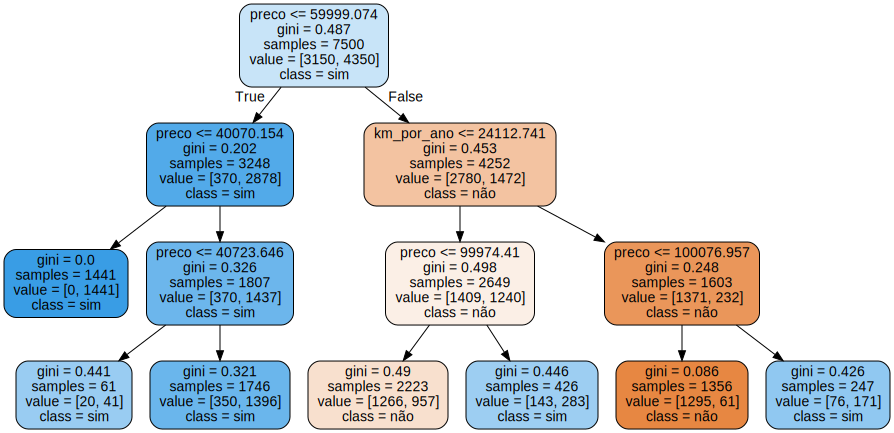

In [0]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, 
                           out_file=None, 
                           filled = True,
                           rounded = True,
                           feature_names = features,
                           class_names = ['não', 'sim'])
grafico = graphviz.Source(dot_data)
grafico